# Curva de calibração - Dados sem repetição

Este notebook aplica a regressão linear, utilizando a equação da reta, em um conjunto de dados de calibração analítica.

Você obtém:

- Gráfico de dispersão de sinal emitido *versus* concentração do analito
- Regressão linear;
    - Parâmetro $b_1$ (coeficiente linear);
    - Parâmetro $b_0$ (coeficiente angular);
    - Equação da reta:
    - Valores preditos para o sinal ($\widehat{y})$;
    - Gráfico de regressão de sinal emitido *versus* concentração do analito, com a equação da reta;
- Análise de variância (ANOVA);
    - Somatórios quadráticos;
    - Graus de liberdade;
    - Média quadrática;
    - Estatística do teste;
    - Valor crítico do teste;
    - p-valor;
    - Conclusão do teste;
    - Verificações;
    - Tabela de ANOVA;
    - Gráfico da distribuição F;
- Coeficiente de determinação;
    - Coeficiente de determinação ajustado;
- Diagnóstico do modelo;
    - Resíduos;
    - Média dos resíduos igual a zero (teste t de Student pareado);
        - Gráfico da distribuição t de Student;
    - Média dos resíduos com distribuição Normal (teste de Shapiro-Wilk);
    - Independência dos resíduos em relação à ordem de coleta;
        - Gráfico dos resíduos *versus* ordem de coleta;
    - Independência dos resíduos em relação ao ajustamento;
        - Gráfico dos resíduos *versus* sinal predito; 
    - Outliers (Resíduos padronizados)
        - Gráfico dos resíduos padronizados *versus* sinal predito; 
    - Correlação dos resíduos;
        - Gráfico do sinal predito *versus* sinal real;
- Intervalo de confiança dos parâmetros;    
    - Parâmetro $b_1$ (coeficiente linear);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;
    - Parâmetro $b_0$ (coeficiente angular);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;   
- Intervalo de confiança do sinal predito;
    - Valores médios;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Valores pontuais;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Gráfico da curva de calibração;
- Predição de uma nova concentração;    
    - Gráfico de predição


## Importações

In [1]:
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [2]:
df = pd.DataFrame({
    "Concentração": [0.1, 0.45401, 1.09765, 1.27936, 2.20611, 2.50064, 3.0403, 3.23583, 4.1699, 4.45308,
                     5.28474, 5.59238, 5.92091, 6.66066, 6.79953, 7.97943, 8.41536, 8.70156, 8.71607, 
                     9.16463, ],
    "Sinal": [-0.0716, 4.1673, 6.5703, 13.815, 11.4501, 12.9554, 20.1575, 17.5633, 26.0317, 22.7573,
              26.303, 30.6885, 33.9402,  30.9228, 34.11, 44.4536, 46.5022, 50.0568, 46.5475, 45.7762],
    "Ordem de coleta": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,],    
    "Ensaio": ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", "Ensaio 5", "Ensaio 6", "Ensaio 7",
               "Ensaio 8", "Ensaio 9", "Ensaio 10", "Ensaio 11", "Ensaio 12", "Ensaio 13", "Ensaio 14",
               "Ensaio 15","Ensaio 16", "Ensaio 17", "Ensaio 18","Ensaio 19", "Ensaio 20",
    ],    
})
dataset_name = "Original"
alfa = 0.05

In [3]:
nome_conc, nome_sinal, nome_ordem, nome_ensaio  = df.columns

In [4]:
# ordenando os dados em relação a coluna concentração para organizar melhor os calculos
df = df.sort_values(by=[nome_conc])

### Plotando o gráfico com os dados

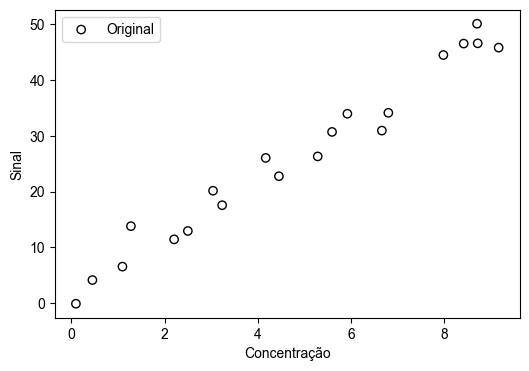

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Leverage

$$ h_{ii} = \frac{1}{n} + \frac{\left(x_{i} - \overline{x} \right)^{2}}{\sum_{i=1}^{n} \left(x_{i} - \overline{x} \right)^{2}}$$

onde:
- $n$ é o número total de amostras;
- $x_{i}$ é a i-ésima observação da amostra;
- $\overline{x}$ é a média da amostra;

$$critico = \frac{fator\times n_{p}}{n}$$

onde:
- $n$ é o número total de amostras;
- $n_{p}$ é o número de parâmetros estimados pelo modelo, incluíndo o intercepto (e.g. $n_{p}=2$;
- $fator$ é o fator de penalização ($2$ (moderado) ou  $3$ (extremo));

In [6]:
df["Alavancagem"] = functions.leverage(df[nome_conc])

In [7]:
functions.check_leverage(df["Alavancagem"], df["Ensaio"], critical=3, n_param=2)

Nenhum ponto com leverage acima de 0.3 foi encontrado


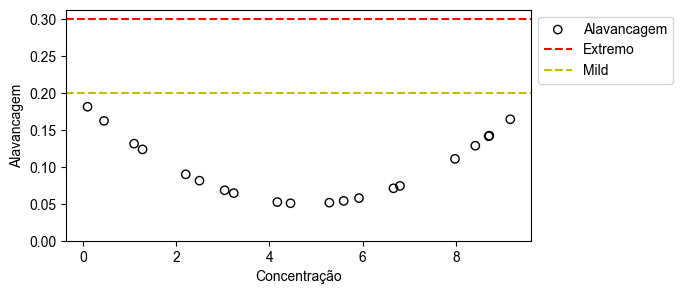

In [8]:
functions.make_leverage_plot(df[nome_conc], df["Alavancagem"])

## Regressão linear com SciPy

In [9]:
reg_linear = stats.linregress(df[nome_conc], df[nome_sinal])

### Coeficiente angular ( $b_{1}$ )

$$b_{1} = \frac{\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i} - \overline{y})}{\sum_{i=1}^{n}(x_{i} - \overline{x})^{2}}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $x_{i}$ é o valor da concentração para a i-ésima observação;
- $\overline{x}$ é a média das concentrações;

> Tem unidade do sinal vezes o inverso da unidade da concentração

In [10]:
b1 = reg_linear[0]
b1

5.111029931824842

### Coeficiente linear ( $b_{0}$ )

$$b_{0} = \frac{\sum_{i=1}^{n} (y_{i}) - b_{1} \times \sum_{i=1}^{n} (x_{i}) }{n}$$

onde:
- $n$ é o número total de observações;
- $b_{1}$ é o coeficiente angular;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $x_{i}$ é o valor da concentração para a i-ésima observação;

> Tem unidade do sinal

In [11]:
b0 = reg_linear[1]
b0

1.7601387357390728

### Equação da reta 

$$sinal = b_{0} + concentração \times b_{1}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;

In [12]:
f"sinal = {b0} + concentração x {b1}"

'sinal = 1.7601387357390728 + concentração x 5.111029931824842'

### Predição valores pontuais

In [13]:
df["ypred"] = b1*df[nome_conc] + b0
df

,Concentração,Sinal,Ordem de coleta,Ensaio,Alavancagem,ypred
0,0.10000,-0.0716,1,Ensaio 1,0.181226,2.271242
1,0.45401,4.1673,2,Ensaio 2,0.162158,4.080597
2,1.09765,6.5703,3,Ensaio 3,0.131323,7.370261
3,1.27936,13.8150,4,Ensaio 4,0.123513,8.298986
4,2.20611,11.4501,5,Ensaio 5,0.089812,13.035633
5,2.50064,12.9554,6,Ensaio 6,0.081249,14.540985
6,3.04030,20.1575,7,Ensaio 7,0.068246,17.299203
7,3.23583,17.5633,8,Ensaio 8,0.064393,18.298563
8,4.16990,26.0317,9,Ensaio 9,0.052285,23.072622
9,4.45308,22.7573,10,Ensaio 10,0.050672,24.519964


### Plotando o gráfico de regressão

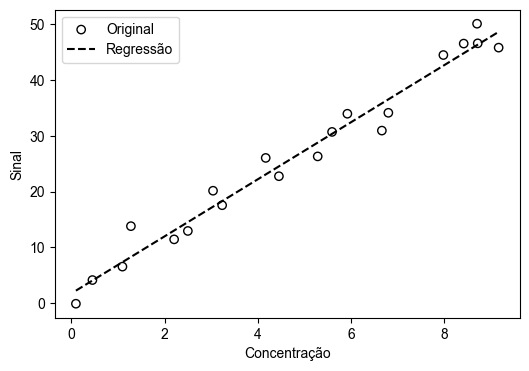

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.plot(df[nome_conc], df['ypred'], label="Regressão", c='k', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## ANOVA

### Somatório dos quadrados TOTAIS ( $SQT$ )

$$ SQT = \sum_{i=1}^{n} (y_{i} - \overline{y})^{2}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [15]:
df['sqt'] = np.square(df[nome_sinal] - df[nome_sinal].mean())

In [16]:
SQT = df['sqt'].sum()
SQT

4506.9991498695

### Grau de liberdade dos quadrados totais ( $gl_{totais}$ )

$$gl_{totais} = n - 1$$

onde:
- $n$ é o número total de observações;

In [17]:
gl_total = df.shape[0] - 1
gl_total

19

### Média dos quadrados totais ( $MSQT$ )

$$ MSQT = \frac{SQT}{gl_{totais}}$$

onde:
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;
- $gl_{totais}$ é o grau de liberdade associado aos $SQT$;

> Tem a unidade do sinal ao quadrado

In [18]:
MSQT = SQT/gl_total
MSQT

237.21048157207895

### Somatório dos quadrados da REGRESSÃO ( $SQR$ )

$$ SQR = \sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}$$


onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [19]:
df['sqr'] = np.square(df["ypred"] - df[nome_sinal].mean())

In [20]:
SQR = df['sqr'].sum()
SQR

4376.063376369209

### Grau de liberdade da regressão ( $gl_{regressão}$ )

$$gl_{regressão} = 1 $$

In [21]:
gl_reg = 1
gl_reg

1

### Média da soma dos quadrados da regressão ( $MSQR$ )

$$MSQR = \frac{SQR}{gl_{regressão}}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;

In [22]:
MSQR = SQR/gl_reg
MSQR

4376.063376369209

### Somatório dos quadrados dos ERROS ( $SQE$ )

$$SQE = \sum_{i=1}^{n} (\widehat{y_{i}} - y_{i})^{2}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $y_{i}$ é o valor do sinal para a i-ésima observação;

> Tem a unidade do sinal ao quadrado

In [23]:
df['sqe'] = np.square(df["ypred"] - df[nome_sinal])

In [24]:
SQE = df['sqe'].sum()
SQE

130.93577350029204

### Grau de liberdade dos erros ( $gl_{erros}$ )

$$gl_{erros} = n - 2$$

onde:
- $n$ é o número total de observações;

In [25]:
gl_erro = df.shape[0] - 2
gl_erro

18

### Média da soma dos quadrados dos erros ( $MSQE$ )

$$MSQE = \frac{SQE}{gl_{erros}}$$

onde:
- $SQE$ é o somatório quadrático da diferença entre cada sinal e respectivo sinal predito;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Tem a unidade do sinal ao quadrado

In [26]:
MSQE = SQE/gl_erro
MSQE

7.274209638905114

### Estatística do teste ( $F_{calculado}$ )

$$ F_{calculado} = \frac{MSQR}{MSQE}$$

onde:
- $MSQR$ é a quantidade média de variância que o modelo consegue explicar;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;



In [27]:
Fcalc = MSQR/MSQE
Fcalc

601.586095754573

### Valor crítico ( $F_{critico}$ )

$$F_{crítico} = F_{1-\alpha, gl_{regressão}, gl{erros}}$$

onde:
- $\alpha$ é o nível de significância adotado;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Utiliza-se a distribuição F unilateral

In [28]:
Ftab = stats.f.ppf(1-alfa, gl_reg, gl_erro)
Ftab

4.413873419170567

### p-valor ( $p-valor$ ) 

In [29]:
p_valor = 1- stats.f.cdf(Fcalc, gl_reg, gl_erro)
p_valor

2.7755575615628914e-15

### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \beta_{1} = 0$$

$$H_{1}: \beta_{1} \neq 0$$

#### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);


#### Utilizando o valor crítico

- Se $F_{crítico} \geq F_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $F_{crítico} < F_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);

In [30]:
if p_valor < alfa:
    anova_significativo = "Sim"
else:
    anova_significativo = "Não"
    
f"A regressão é significativa? {anova_significativo}"

'A regressão é significativa? Sim'

### Verificações

#### Somatório dos quadrados

$$ SQT = SQR + SQE$$

In [31]:
SQT == SQR + SQE

False

#### Graus de liberdade

$$ gl_{total} = gl_{regressão} + gl_{erros}$$

In [32]:
gl_total == gl_reg + gl_erro

True

### Tabela de ANOVA

In [33]:
df_anova = pd.DataFrame({
    "Fonte de Variação": ["Regressão", "Resíduos", "Total"],
    "Somatório": [SQR, SQE, SQT],
    "gl": [gl_reg, gl_erro, gl_total],
    "Médias": [MSQR, MSQE, MSQT],
    "F calculado": [Fcalc, "", ""],
    "F tabelado": [Ftab, "", ""],
    "p-valor": [p_valor, "", ""],
    "Singnificativo?": [anova_significativo, "", ""]
})
df_anova

,Fonte de Variação,Somatório,gl,Médias,F calculado,F tabelado,p-valor,Singnificativo?
0,Regressão,4376.063376,1,4376.063376,601.586096,4.413873,0.0,Sim
1,Resíduos,130.935774,18,7.274210,,,,
2,Total,4506.999150,19,237.210482,,,,


### Gráfico da distribuição F

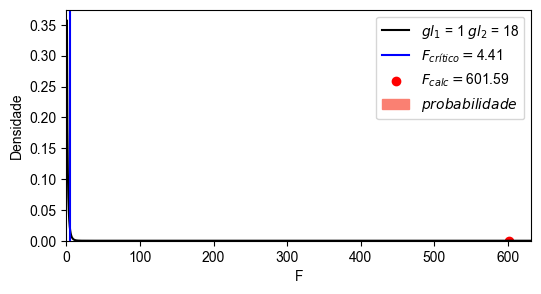

In [34]:
functions.make_f_distribution_plot(Fcalc, gl_reg, gl_erro, alpha=alfa)

## Coeficiente de determinação ( $R^{2}$ )

$$R^{2} = \frac{SQR}{SQT}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;


$$R^{2} = \frac{\sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}}{\sum_{i=1}^{n} (y_{i} - \overline{y})^{2}}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $y_{i}$ é o valor do sinal para a i-ésima observação;


In [35]:
R2 = SQR/SQT
R2

0.9709483474155788

### Coeficiente de determinação ajustado ( $R_{ajustado}^{2}$ )

$$R_{ajustado}^{2} = 1 - \frac{MSQE}{MSQT}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $MSQT$ é a média de toda a variância;

In [36]:
R2ajustado = 1 - MSQE/MSQT
R2ajustado

0.9693343667164439

## Diagnóstico do modelo

### Resíduos ( $resíduos$ )

$$ resíduos = y_{i} - \widehat{y_{i}}$$

onde:
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;


In [37]:
df['Resíduos'] = df[nome_sinal] - df['ypred']

### Média dos resíduos igual a zero (teste t de Student pareado)

$$t_{calc} = \frac{(\overline{resíduos} - \mu_{0}) \times \sqrt{n}}{s_{resíduos}}$$


onde:
- $n$ é o número total de observações;
- $\overline{resíduos}$ é a média dos resíduos;
- $\mu_{0}$ é o valor esperado para os resíduos, ( e.g., $\mu_{0}=0$ );
- $s_{resíduos}$ é o desvio padrão dos resíduos ( $\sqrt{MSQE}$ );

#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \overline{resíduos} = \mu_{0} = 0$$

$$H_{1}: \overline{resíduos} \neq \mu_{0} \neq 0$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $t_{crítico} < t_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [38]:
print(f"Os resídos tem média = {df['Resíduos'].mean()} e desvio padrão = {np.sqrt(MSQE)}")

Os resídos tem média = -1.1324274851176596e-15 e desvio padrão = 2.697074273894791


In [39]:
paired_t_test_mean = df['Resíduos'].mean()/(np.sqrt(MSQE)/np.sqrt(df.shape[0]))
paired_t_test_mean

-1.877727180761352e-15

In [40]:
paired_t_test_mean_p = (1 - stats.t.cdf(np.abs(paired_t_test_mean), gl_erro))*2
paired_t_test_mean_p

0.9999999999999987

In [41]:
if paired_t_test_mean_p < alfa:
    print(f"A média dos resíduos é diferente de 0 (p-valor = {round(paired_t_test_mean_p, 2)})")
else:
    print(f"A média dos resíduos é igual a 0 (p-valor = {round(paired_t_test_mean_p, 2)})")

A média dos resíduos é igual a 0 (p-valor = 1.0)


In [42]:
t_critico = stats.t.ppf(1-alfa/2, gl_erro)
t_critico

2.10092204024096

#### Gráfico da distribuição t de Student para a média dos resíduos

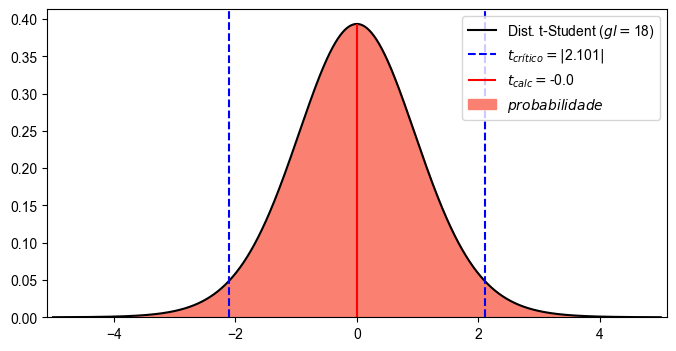

In [43]:
functions.make_t_distribution_plot(t_calc=paired_t_test_mean, gl=gl_erro, alpha=alfa)

### Resíduos apresentam distribuição Normal ( Shapiro-Wilk )


#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: Os \; resíduos \; apresentam \; distribuição \; Normal$$

$$H_{1}: Os \; resíduos \; não \; apresentam \; distribuição \; Normal$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***não apresentam distribuição Normal***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***apresentam distribuição Normal***);


In [44]:
norm_test_stats, norm_test_p_value = stats.shapiro(df['Resíduos'])

In [45]:
if norm_test_p_value < alfa:
    print(f"Os resíduos não apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")
else:
    print(f"Os resíduos apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")

Os resíduos apresentam distribuição Normal (p_valor = 0.799)


In [53]:
df["Resíduos"].var()

6.8913565000153705

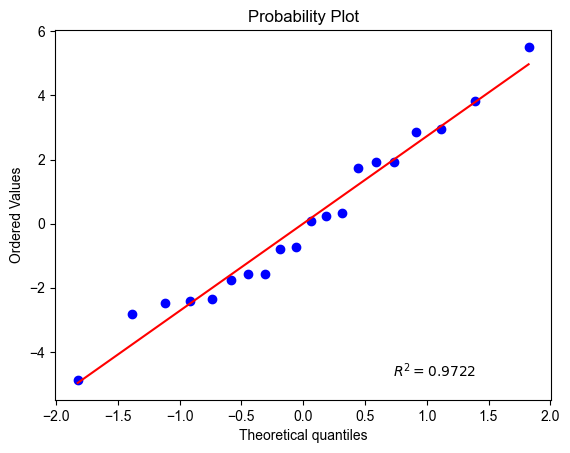

In [51]:

fig, ax = plt.subplots()
x_data, y_data = stats.probplot(df["Resíduos"], dist='norm', fit=True, plot=plt, rvalue=True)
plt.show()

In [49]:
x_data

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

In [50]:
y_data

array([-4.88017136, -2.82463698, -2.46760306, -2.40274009, -2.34284173,
       -1.7626639 , -1.58558462, -1.58553298, -0.79996074, -0.73526272,
        0.08670256,  0.23926661,  0.34553969,  1.73090442,  1.9103557 ,
        1.91811303,  2.85829696,  2.95907755,  3.82272765,  5.51601401])

In [48]:
a

NameError: name 'a' is not defined

### Independência dos resíduos em relação à ordem de coleta


#### Gráfico dos resíduos *versus* ordem de coleta

In [ ]:
functions.make_residuals_plot_acquisition_order(df["Resíduos"], aquisition_order=df["Ordem de coleta"])

### Independência dos resíduos em relação ao ajustamento

#### Gráfico dos resíduos *versus* sinal predito

In [ ]:
functions.make_independent_residuals_plot(residuals=df["Resíduos"], predicted=df["ypred"])

### Outliers (Resíduos padronizados)

$$resíduo \; padronizado_{i} = \frac{resíduo_{i}}{\sqrt{MSQE}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;


#### Conclusão

> Se $|resíduo \; padronizado_{i}| > 3$, a i-ésima observação é um possível outlier

In [ ]:
df['Resíduos Padronizados'] = functions.standardized_residuals(df['Resíduos'], MSQE)

In [ ]:
functions.check_standardized_residuals(df['Resíduos Padronizados'], df["Ensaio"], limite=2)

In [ ]:
functions.check_standardized_residuals(df['Resíduos Padronizados'], df["Ensaio"], limite=3)

#### Gráfico dos resíduos padronizados *versus* sinal predito

In [ ]:
functions.make_standardized_residuals(df["Resíduos Padronizados"], df["ypred"])

#### Resíduos studentizados


$$resíduo \; student_{i} = \frac{resíduo_{i}}{\sqrt{MSQE \times \left(1 - h_{ii} \right)}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $h_{ii}$ é a alavancagem da i-ésima observação;


#### Conclusão

> Se $|resíduo \; student_{i}| > 3 $, a i-ésima observação é um possível outlier extremo

> Se $|resíduo \; student_{i}| > 2 $, a i-ésima observação é um possível outlier moderado

In [ ]:
df['Resíduos Studentizados'] = functions.studentized_residuals(df["Resíduos"], MSQE, df["Alavancagem"])

In [ ]:
functions.check_studentized_residuals(df['Resíduos Studentizados'], df['Ensaio'])     

In [ ]:
functions.check_studentized_residuals(df['Resíduos Studentizados'], df['Ensaio'], limite=3)     

In [ ]:
functions.make_studentized_residuals_plot(df['Resíduos Studentizados'], df['ypred'])

#### Resíduos studentizados excluído (ou studentizados externamente)

$$t_{i} = \frac{resíduo_{i}}{\sqrt{MSQE_{i} \times \left(1- h_{ii} \right)}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $h_{ii}$ é a alavancagem da i-ésima observação;
- $MSQE_{i}$ é a média da soma dos quadrados dos erros obtida *excluindo* a i-ésima observação;


$$t_{i} = res \; student_{i} \left( \frac{n - n_{p} - 1}{n - n_{p} - res \; student_{i}^{2}} \right)^{2}$$

onde:
- $res \; student_{i}$ é o resíduo studentizado da i-ésima observação;
- $n$ é o número total de observações;
- $n_{p}$ é o número de parâmetros do modelo, incluindo o intercepto ( e.g. $n_{p}=2$ );


In [ ]:
df["Resíduos studentizados deletados"] = functions.deleted_t_residuals(df["Resíduos"], df["Alavancagem"], MSQE)

In [ ]:
functions.check_deleted_t_residuals(df["Resíduos studentizados deletados"], df["Ensaio"])

In [ ]:
functions.make_deleted_t_residuals(df["Resíduos studentizados deletados"], df["ypred"], n_param=2, alpha_mild=0.05, alpha_extreme=0.01)

In [ ]:
df["Cook"] = functions.cook_distance(df["Resíduos Studentizados"], df["Alavancagem"])

In [ ]:
functions.check_cooks_distance(df["Cook"], df["Ensaio"], influential=1)

In [ ]:
functions.make_cook_distance_plot(df["Cook"], df["Ensaio"], influential_mild=0.5, influential_extreme=1.0)

In [ ]:
functions.make_slopes_versus_intercepts_plot(df[nome_conc], df[nome_sinal], df["Ensaio"])

In [ ]:
a

### Correlação dos resíduos ( $r_{pearson}$ )



$$r_{pearson} = \frac{\sum_{i=1}^n (y_i - \overline{y}) (\widehat{y_{i}} - \overline{\widehat{y}})}{\sqrt{\sum_{i=1}^n ((y_i - \overline{y})^2 \sum_{i=1}^n ((\widehat{y_{i}} - \overline{\widehat{y}})^2}}$$

onde
- $n$ é o número total de observações;
- $y_i$ é a i-ésima observação do sinal;
- $\overline{y}$ é a média do sinal;
- $\widehat{y_{i}}$ é a i-ésima observação do sinal predito;
- $\overline{\widehat{y}}$ é a média do sinal predito;


In [ ]:
residual_r_pearson, _ = stats.pearsonr(df[nome_sinal], df['ypred'])

In [ ]:
if residual_r_pearson > 0.90:
    print(f"A correlação entre o sinal experimental e o sinal predito é forte (r_pearson = {round(residual_r_pearson, 2)})")
else:
    print(f"A correlação entre o sinal experimentais e o sinal predito NÃO é forte (r_pearson = {round(residual_r_pearson, 2)})")

#### Gráfico do sinal predito *versus* sinal real

In [ ]:
# obtendo o limite inferior para o eixo x
if df[nome_sinal].min() > df['ypred'].min():
    x_min = df['ypred'].min()
else:
    x_min = df[nome_sinal].min()

# obtendo o limite inferior para o eixo y    
if df[nome_sinal].max() > df['ypred'].max():
    x_max = df[nome_sinal].max()
else:
    x_max = df['ypred'].max()  
    
x_max = x_max + 0.2*x_min
x_min = x_min - 0.2*x_min

# criando o canvas
plt.figure()
# adicionando os resíduos
text = "$r_{pearson}$" + f" = {round(residual_r_pearson, 2)}"
plt.scatter(df[nome_sinal], df['ypred'], edgecolors='k', facecolor='None', label=text)
# adicionando reta com slope = 1
plt.axline(xy1=(df[nome_sinal].mean(), df[nome_sinal].mean()), slope=1, color="black", linestyle="--", label="reta com slope=1")
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.xlabel("Sinal observado")
plt.ylabel("Sinal predito")
plt.legend(loc=4)
plt.axis('equal')
plt.show()

## Intervalo de confiança dos parâmetros

### Coeficiente angular ( $b_{1}$ )


#### Desvio padrão

$$s_{b_{1}} = \sqrt{\frac{MSQE}{S_{xx}}}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração, que é estimado por:

$$S_{xx} = \sum_{i=1}^{n} (x_{i} - \overline{x})^2$$

onde:
- $n$ é o número total de observações;
- $x_i$ é a i-ésima observação da concentração;
- $\overline{x}$ é a média da concentração;

> O $S_{xx}$ tem unidade da concentração ao quadrado

> O $s_{b_{1}}$ tem unidade do sinal divido pelo sinal da concentração

In [ ]:
df['sxx'] = np.square(df[nome_conc] - df[nome_conc].mean())
Sxx = np.sum(df['sxx'])
Sxx

In [ ]:

b1_std = np.sqrt(MSQE/Sxx)
b1_std

#### Intervalo de confiança ( $IC_{b_{1}}$ )

$$ IC_{b_{1}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{1}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal divido pelo sinal da concentração

In [ ]:
ic_b1 = t_critico*b1_std
ic_b1

#### Valor verdadeiro

O valor verdadeiro de $b_{1}$ esta dentro do intervalo:

$$b_{1} - IC_{b_{1}} \leq b_{1} \leq b_{1} + IC_{b_{1}}$$


In [ ]:
f"{round(b1 - ic_b1, 4)} ≤ b1 ≤  {round(b1 + ic_b1, 4)}" 

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{1}} = \frac{b_{1}}{s_{b_{1}}}$$

onde:
- $b_{1}$ é o coeficiente angular;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular;


Hipótese:

$$H_{0}: \beta_{1} = 0$$
$$H_{1}: \beta_{1} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [ ]:
t_b1 = b1/b1_std
t_b1

In [ ]:
p_valor_b1 = (1 - stats.t.cdf(t_b1, gl_erro))*2
p_valor_b1

In [ ]:
if p_valor_b1 < alfa:
    b1_significante = "Sim"
    print(f"O coeficiente angular ({round(b1, 3)}) é diferente de zero (p-valor = {round(p_valor_b1, 3)})")
else:
    b1_significante = "Não"
    print(f"O coeficiente angular ({round(b1, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 3)})")


##### Gráfico da distribuição t de Student para o $b_{1}$

In [ ]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b1):
    x_aux = 5
else:
    x_aux = np.abs(t_b1) + 0.2*np.abs(t_b1)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b1, 2))
ax1.scatter(t_b1, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b1), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b1), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

### Coeficiente linear ( $b_{0}$ )


#### Desvio padrão

$$s_{b_{0}} = \sqrt{MSQE \left( \frac{1}{n} + \frac{\overline{x}^{2}}{S_{xx}} \right)}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;



> O $s_{b_{0}}$ tem unidade do sinal

In [ ]:
b0_std = np.sqrt(MSQE*(1/df.shape[0] + df[nome_conc].mean()**2/Sxx))
b0_std

#### Intervalo de confiança ( $IC_{b_{0}}$ )

$$ IC_{b_{0}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{0}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{0}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal

In [ ]:
ic_b0 = b0_std*t_critico
ic_b0

#### Valor verdadeiro

O valor verdadeiro de $b_{0}$ esta dentro do intervalo:

$$b_{0} - IC_{b_{0}} \leq b_{0} \leq b_{0} + IC_{b_{0}}$$

In [ ]:
f"{round(b0 - ic_b0, 4)} ≤ b0 ≤  {round(b0 + ic_b0, 4)}" 

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{0}} = \frac{b_{0}}{s_{b_{0}}}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $s_{b_{0}}$ é o desvio padrão do coeficiente linear;


Hipótese:

$$H_{0}: \beta_{0} = 0$$
$$H_{1}: \beta_{0} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [ ]:
t_b0 = b0/b0_std
t_b0

In [ ]:
p_valor_b0 = (1 - stats.t.cdf(t_b0, gl_erro))*2
p_valor_b0

In [ ]:
if p_valor_b0 < alfa:
    b0_significante = "Sim"
    print(f"O coeficiente linear ({round(b0, 3)}) é diferente de zero (p-valor = {round(p_valor_b0, 3)})")
else:
    b0_significante = "Não"
    print(f"O coeficiente linear ({round(b0, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 0)})")


##### Gráfico da distribuição t de Student para o $b_{0}$

In [ ]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b0):
    x_aux = 5
else:
    x_aux = np.abs(t_b0) + 0.2*np.abs(t_b0)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b0, 2))
ax1.scatter(t_b0, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b0), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b0), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

## Intervalo de confiança do sinal predito

### Valores médios

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [ ]:
# criando um novo dataframe com apenas informações relevantes para a predição
df_pred = df[[nome_conc, nome_sinal, 'ypred']].copy()

In [ ]:
df_pred["Médios IC"] = t_critico*np.sqrt(MSQE*(1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Médios L. Inferior"] = df_pred['ypred'] -  df_pred["Médios IC"]
df_pred["Médios L. Superior"] = df_pred['ypred'] +  df_pred["Médios IC"]
df_pred

#### Gráfico de calibração com as bandas médias

In [ ]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='r', ls='--', label="Bandas Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Valores pontuais

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{m} + \frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $m$ é o número de repetições obtidos para $x_{interesse}$;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [ ]:
df_pred["Individuais IC"] = t_critico*np.sqrt(MSQE*(1 + 1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Individuais L. Inferior"] = df_pred['ypred'] -  df_pred["Individuais IC"]
df_pred["Individuais L. Superior"] = df_pred['ypred'] +  df_pred["Individuais IC"]
df_pred

#### Gráfico de calibração com as bandas pontuais

In [ ]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda de predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Banda de Predição")
# adicionando banda de predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Gráfico da curva de calibração

In [ ]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='gray', ls='--', label="Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='gray', ls='--')
# adicionando banda predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Predição")
# adicionando banda predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Predição de uma nova concentração

Invertendo a equação:

$$concentração = \frac{sinal_{interesse} - b_{0}}{b_{1}} \pm t_{gl_{erros}, \; 1-\alpha/2} \times s_{c}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{c}$ é o desvio padrão da concentração, que é estimado da seguinte forma:
- $sinal_{interesse}$ é o sinal para predizar a concentração;

$$s_{c} = \frac{\sqrt{MSQE}}{|b_{1}|} \sqrt{\frac{1}{m} + \frac{1}{n} + \frac{\left( sinal_{interesse} - \overline{sinal} \right)^{2}}{b_{1}^{2}S_{xx}} }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração do modelo;
- $n$ é o número total de observações utilizada para obter os parâmetros do modelo;
- $m$ é o número de repetições obtidos para $sinal_{interesse}$;
- $\overline{sinal}$ é a média dos sinais utilizado para obter os parâmetros do modelo;
- $sinal_{interesse}$ é o sinal para predizar a concentração;
- $b_{1}$ é o coeficiente angular;

In [ ]:
df_pred_inv = df[[nome_conc, nome_sinal]].copy()
df_pred_inv['ypred'] = (df_pred_inv[nome_sinal] - b0)/b1
df_pred_inv['s_predicao'] = (np.sqrt(MSQE)/np.abs(b1))*np.sqrt(1 + 1/df_pred_inv.shape[0] + np.square(df_pred_inv[nome_sinal] - df_pred_inv[nome_sinal].mean())/(np.square(b1)*Sxx))
df_pred_inv['ic_predicao'] = df_pred_inv['s_predicao']*t_critico
df_pred_inv['ic_predicao inferior'] = df_pred_inv['ypred'] - df_pred_inv['ic_predicao']
df_pred_inv['ic_predicao superior'] = df_pred_inv['ypred'] + df_pred_inv['ic_predicao']
df_pred_inv

### Gráfico de predição

In [ ]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os dados experimentais
plt.scatter(df[nome_sinal], df[nome_conc], label="Dados experimentais", edgecolors='k', facecolor='None')

# adicionando a linha de regressão
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ypred'], label="Regressão", c='k', ls='--')

# adicionando a banda de predição
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao inferior'], label='Predição', c='r', ls='--')
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao superior'], c='r', ls='--')

plt.legend()
plt.xlabel(nome_sinal)
plt.ylabel(nome_conc)
plt.show()